# Section 1: perceptrons with tensorflow

In [1]:
# import modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, LeakyReLU, Input, BatchNormalization, Softmax, Reshape, Conv2DTranspose
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

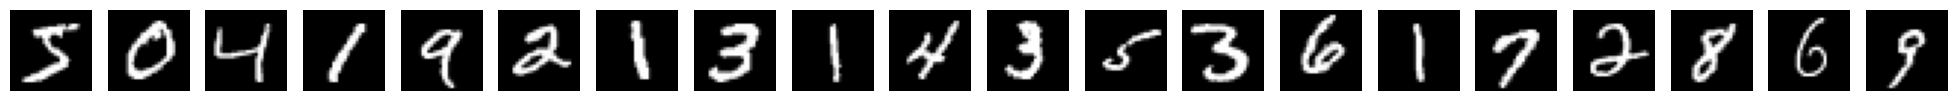

In [3]:
num_images = 20
selected_images = train_images[:num_images]

plt.figure(figsize=(25, 25))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
# Normalize to between -1 and 1
train_images = (train_images - 127.5) / 127.7
test_images = (test_images - 127.5) / 127.7

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [5]:
activation_funcion = lambda: LeakyReLU(alpha=0.2)
use_normalisation = True
use_dropout = True

In [6]:
model_conv = Sequential()

model_conv.add(Input((28, 28, 1)))
if use_normalisation: model_conv.add(BatchNormalization())

model_conv.add(Conv2D(10, kernel_size=(5, 5)))
model_conv.add(Flatten())
model_conv.add(activation_funcion())
if use_dropout: model_conv.add(Dropout(0.2))

model_conv.add(Dense(20))
model_conv.add(activation_funcion())
if use_dropout: model_conv.add(Dropout(0.2))


model_conv.add(Dense(10))
model_conv.add(Softmax())

In [7]:
model_conv.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 flatten (Flatten)           (None, 5760)              0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 5760)              0         
                                                                 
 dropout (Dropout)           (None, 5760)              0         
                                                                 
 dense (Dense)               (None, 20)                115220    
                                                        

In [9]:
model_conv.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(test_images, test_labels)
)

Epoch 1/10


1875/1875 [==============================] - 44s 21ms/step - loss: 0.2841 - accuracy: 0.9153 - val_loss: 0.1130 - val_accuracy: 0.9643
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1466 - accuracy: 0.9557 - val_loss: 0.0774 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1251 - accuracy: 0.9616 - val_loss: 0.0709 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1087 - accuracy: 0.9666 - val_loss: 0.0709 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0992 - accuracy: 0.9690 - val_loss: 0.0638 - val_accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0947 - accuracy: 0.9704 - val_loss: 0.0603 - val_accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0855 - accuracy: 0.9735 - val_loss: 0.0578

In [10]:
test_loss, test_accuracy = model_conv.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 8ms/step - loss: 0.0605 - accuracy: 0.9807
Test Accuracy: 98.07%


In [11]:
model_FFN = Sequential()

model_FFN.add(Input((28, 28, 1)))
model_FFN.add(Flatten())
if use_normalisation: model_conv.add(BatchNormalization())

for _ in range(2):
    model_FFN.add(Dense(100))
    model_FFN.add(activation_funcion())
    if use_dropout: model_conv.add(Dropout(0.2))

model_FFN.add(Dense(10))
model_FFN.add(Softmax())

In [12]:
model_FFN.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model_FFN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 softmax_1 (Softmax)         (None, 10)               

In [14]:
model_FFN.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 23s 10ms/step - loss: 0.3035 - accuracy: 0.9079 - val_loss: 0.1737 - val_accuracy: 0.9482
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1618 - accuracy: 0.9498 - val_loss: 0.1279 - val_accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1270 - accuracy: 0.9613 - val_loss: 0.1484 - val_accuracy: 0.9534
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1075 - accuracy: 0.9676 - val_loss: 0.1376 - val_accuracy: 0.9592
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0902 - accuracy: 0.9715 - val_loss: 0.1280 - val_accuracy: 0.9633
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0841 - accuracy: 0.9736 - val_loss: 0.1161 - val_accuracy: 0.9655
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0764 - accuracy: 0.9759 - val_loss: 0.1030 - v

In [15]:
test_loss, test_accuracy = model_FFN.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 8ms/step - loss: 0.1077 - accuracy: 0.9717
Test Accuracy: 97.17%


# Section 2: Perceptron with numpy

# Section 3: GAN

In [16]:
# combine test and train data. 
images_real = np.vstack((train_images, test_images))
labels_real = np.concatenate((train_labels, test_labels))

In [17]:
images_real.shape

(70000, 28, 28)

In [18]:
labels_real.shape

(70000, 10)

In [19]:
num_real_data_items = images_real.shape[0]

In [20]:
activation_funcion = lambda: LeakyReLU(alpha=0.2)
use_normalisation = True
use_dropout = True

In [21]:
# create discriminator model similar to perceptron
model_discriminator = Sequential()

model_discriminator.add(Input((28, 28, 1)))
if use_normalisation: model_discriminator.add(BatchNormalization())

# model_discriminator.add(Conv2D(10, kernel_size=(5, 5)))
model_discriminator.add(Flatten())
# model_discriminator.add(activation_funcion())
# if use_dropout: model_discriminator.add(Dropout(0.2))

for _ in range(4):
    model_discriminator.add(Dense(100))
    model_discriminator.add(activation_funcion())
    if use_dropout: model_discriminator.add(Dropout(0.2))


model_discriminator.add(Dense(1))
model_discriminator.add(Softmax())


In [22]:
model_discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 28, 28, 1)         4         
 chNormalization)                                                
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100)               0         
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                      

In [23]:
model_discriminator.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [24]:
# create model generator
model_generator = Sequential()

model_generator.add(Input(110))

model_generator.add(Dense(16**2))   
model_generator.add(activation_funcion())
if use_dropout: model_generator.add(Dropout(0.2))


model_generator.add(Dense(16**2))   
model_generator.add(activation_funcion())
if use_dropout: model_generator.add(Dropout(0.2))

model_generator.add(Reshape((16, 16, 1)))

# map 16*16 to 22*22
model_generator.add(Conv2DTranspose(1, (7, 7), (1, 1)))
model_generator.add(activation_funcion())
if use_dropout: model_generator.add(Dropout(0.2))


# map 22*22 to 28*28
model_generator.add(Conv2DTranspose(1, (7, 7), (1, 1)))
model_generator.add(Softmax())

In [25]:
model_generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               28416     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 1)        

In [26]:
# GAN_combined_model = Sequential(
#     model_discriminator,
#     model_generator
# )

generator_input = Input(110)
generator_output = model_generator(generator_input)
discriminator_output = model_discriminator(generator_output)

GAN_combined_model = Model(inputs=generator_input, outputs=discriminator_output)

GAN_combined_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [27]:
# Generate a random noise vector
random_seed_vector = np.random.randn(100).reshape(1, 100)

# Generate a ra ndom one-hot encoded label
random_label = np.random.randint(0, 10, 1)
print(f"generator given input number (image to produce):   {random_label}")
one_hot_label = to_categorical(random_label, num_classes=10)

# Generate a fake image using the generator, with both noise and label as inputs
generator_input = np.concatenate((random_seed_vector, one_hot_label), axis=1)

generator given input number (image to produce):   [8]


1/1 [==============================] - 0s 472ms/step


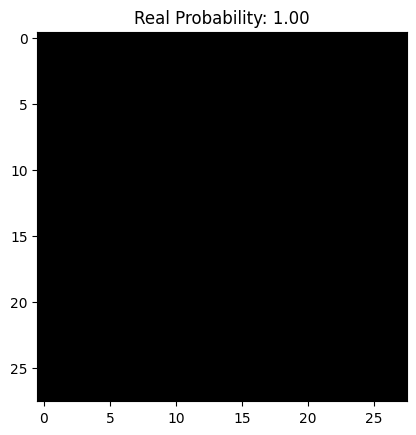

In [28]:
fake_image = model_generator.predict(generator_input)

# Predict the "realness" of the fake image using the discriminator, also providing the one-hot label
real_probability = model_discriminator.predict(fake_image)[0][0]

# Plot the fake image
plt.imshow(fake_image.reshape(28, 28), cmap="gray")

# Here, using 'xlabel' to show the real_probability might not be visually appealing,
# you might consider using the title or printing the value instead
plt.title(f"Real Probability: {real_probability:.2f}")
plt.show()

In [29]:
def create_chunk_of_generator_inputs(chunk_size):
    # Generate a random noise vector
    random_seed_vectors = np.random.randn(100*chunk_size).reshape(chunk_size, 100)

    # Generate a random one-hot encoded label
    random_labels = np.random.randint(0, 10, chunk_size)
    one_hot_labels = to_categorical(random_labels, num_classes=10)

    # Generate a fake image using the generator, with both noise and label as inputs
    generator_inputs = np.concatenate((random_seed_vectors, one_hot_labels), axis=1)
    return generator_inputs

In [30]:
create_chunk_of_generator_inputs(100).shape

(100, 110)

In [31]:
def generate_real_training_chunks(chunk_size):
    assert 1 <= chunk_size and isinstance(chunk_size, int)

    num_chunks = num_real_data_items // chunk_size

    # make array of indexes corresponding to training data items
    indexes = np.arange(num_real_data_items)
    # shuffle the array
    np.random.shuffle(indexes)
    
    # yield sections of the 
    for chunk_num in range(num_chunks):
        chunk_indexes = indexes[chunk_size*chunk_num: chunk_size*(chunk_num+1)]

        chunk_images = np.array([images_real[index] for index in chunk_indexes])
        chunk_labels = np.array([labels_real[index] for index in chunk_indexes])

        yield (chunk_images, chunk_labels)

In [32]:
def create_fake_training_chunk(chunk_size):
    generator_inputs = create_chunk_of_generator_inputs(chunk_size)
    return model_generator.predict(generator_inputs)


In [33]:
np.full((100,), 1).shape

(100,)

In [34]:
for chunk_real_images, chunk_real_labels in generate_real_training_chunks(100):
    print(chunk_real_images.shape)

(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 28, 28)
(100, 

In [35]:
def plot_images_from_generator():
    fig, axes = plt.subplots(10, 10, figsize=(14,14))
    for number_to_plot in range(10):
        for j in range(10):
            random_seed_vector = np.random.randn(100)
            
            one_hot_label = to_categorical(number_to_plot, num_classes=10)


            generator_input = np.concatenate([random_seed_vector, one_hot_label]).reshape(1, 110)
            # print(generator_input.shape)
            generated_image = model_generator.predict(generator_input)

            axes[number_to_plot, j].imshow(
                generated_image.reshape(28, 28),
                cmap="gray"
            )

    plt.show()
    plt.close()

1/1 [==============================] - 0s 50ms/step


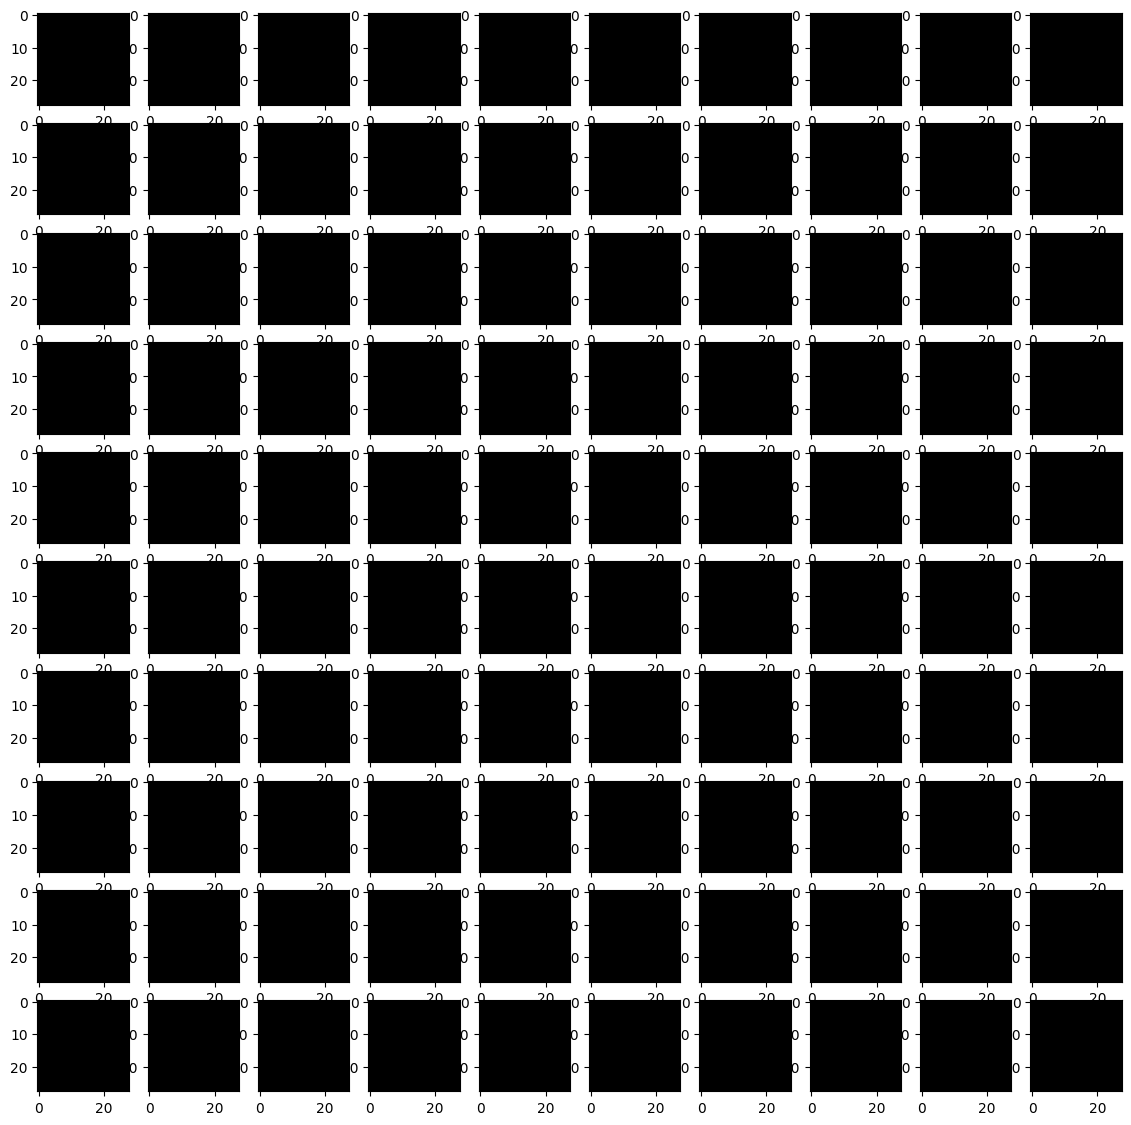

In [36]:
plot_images_from_generator()

In [37]:
real_batch_size = 50
num_batches = num_real_data_items // real_batch_size
num_batches_before_alternating = 20
epochs = 1

In [38]:
chunk_size = num_batches_before_alternating * real_batch_size
model_discriminator.trainable = True


for epoch in range(epochs):
    # plot_images_from_generator()
    # train both models in together training on a few batches each before alternating
    # get real data items for training in chunks
    for chunk_real_images, chunk_real_labels in generate_real_training_chunks(chunk_size):
        # train discriminator
        
        model_discriminator.fit(
            chunk_real_images,
            np.full((chunk_size,), 1),
            epochs=1,
            batch_size=real_batch_size,
        )
        
        model_discriminator.fit(
            create_fake_training_chunk(chunk_size),
            np.full((chunk_size,), 0),
            epochs=1,
            batch_size=real_batch_size,
        )

        # # train generator
        # model_discriminator.trainable = False
        
        # GAN_combined_model.fit(
        #     create_chunk_of_generator_inputs(chunk_size*2),
        #     np.full((chunk_size*2,), 1),
        #     epochs=1,
        #     batch_size=real_batch_size
        # )

        # model_discriminator.trainable = True



20/20 [==============================] - 0s 5ms/step - loss: 1.0770e-06 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 31ms/step


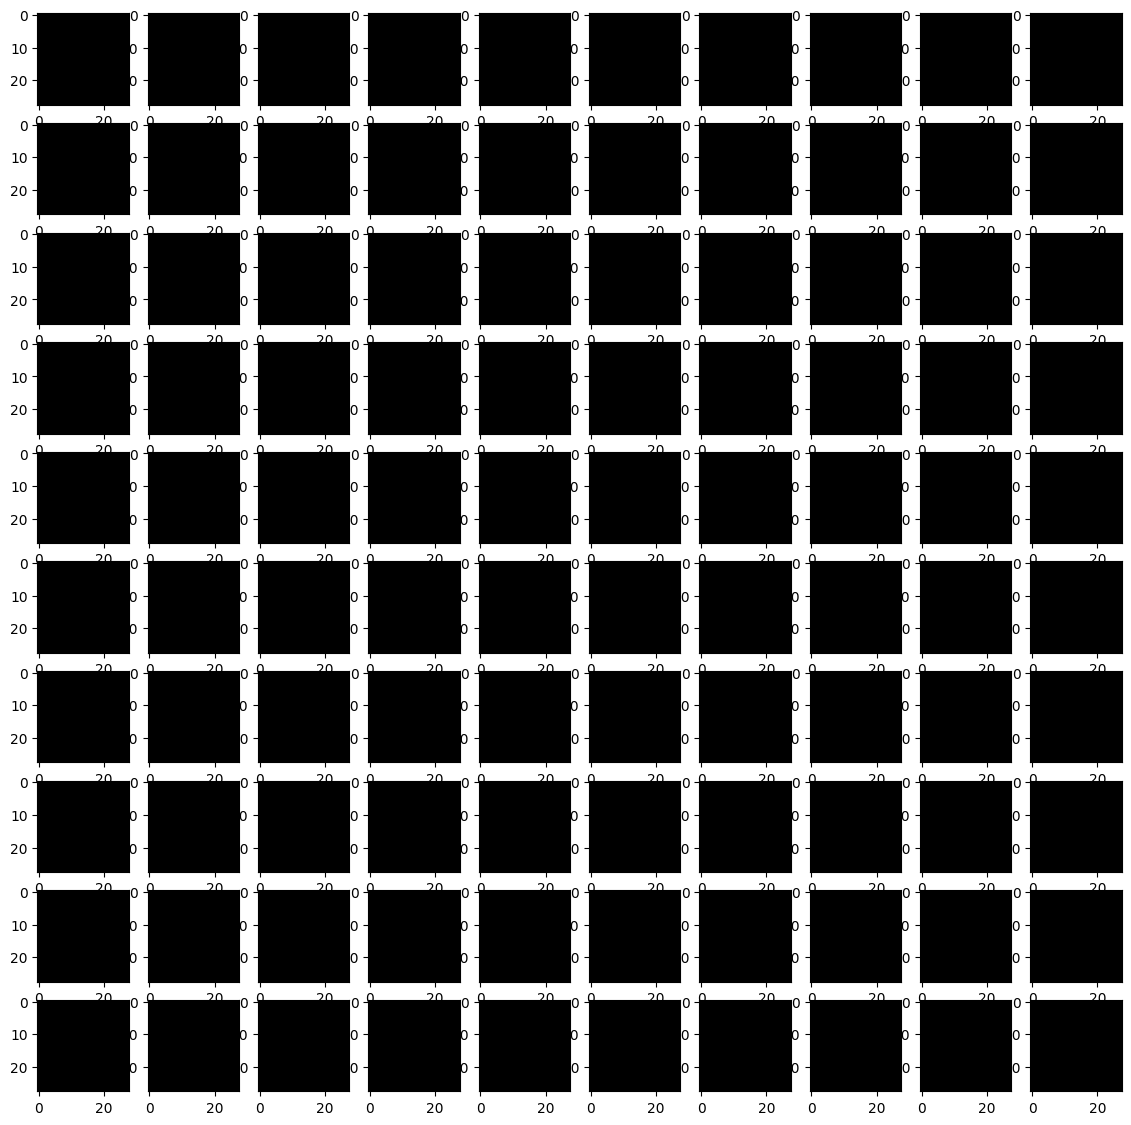

In [39]:
plot_images_from_generator()

In [40]:
for real_images, real_labels in generate_real_training_chunks(50):
    print(model_discriminator.predict(real_images))
    break

InvalidArgumentError: Graph execution error:

Detected at node sequential_2/batch_normalization_2/FusedBatchNormV3 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1077, in launch_instance

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\Henry\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\Henry\AppData\Local\Temp\ipykernel_15280\2079818257.py", line 2, in <module>

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2655, in predict

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 597, in call

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 990, in _fused_batch_norm

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\control_flow_util.py", line 108, in smart_cond

  File "c:\Users\Henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py", line 979, in _fused_batch_norm_inference

input must be 4-dimensional[32,28,28]
	 [[{{node sequential_2/batch_normalization_2/FusedBatchNormV3}}]] [Op:__inference_predict_function_242624]

In [ ]:
fake_images = create_fake_training_chunk(50)
print(model_discriminator.predict(fake_images))